In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
import librosa
from lightgbm import LGBMClassifier, plot_importance
import optuna
from sklearn.model_selection import StratifiedKFold

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:

DATASET_DIR = 'E:\Học máy trong y tế\\archive'
print('DATASET DIR ::',DATASET_DIR)

# >------ global variables  ------------------------------------------

BASIC_SRATE = 360 #Hz
print('Basic sampling rate(Hz):',BASIC_SRATE)

DATASET DIR :: E:\Học máy trong y tế\archive
Basic sampling rate(Hz): 360


In [4]:
for dirname, _, filenames, in os.walk(DATASET_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 


E:\Học máy trong y tế\archive\mitbih_test.csv
E:\Học máy trong y tế\archive\mitbih_train.csv
E:\Học máy trong y tế\archive\ptbdb_abnormal.csv
E:\Học máy trong y tế\archive\ptbdb_normal.csv


In [6]:
test = pd.read_csv('E:\Học máy trong y tế\\archive\mitbih_test.csv',header = None)
train = pd.read_csv('E:\Học máy trong y tế\\archive\mitbih_train.csv',header = None)
print('train')
train.info()
print('test')
test.info()

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
train[187]=train[187].astype(int)
train.loc[:,187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

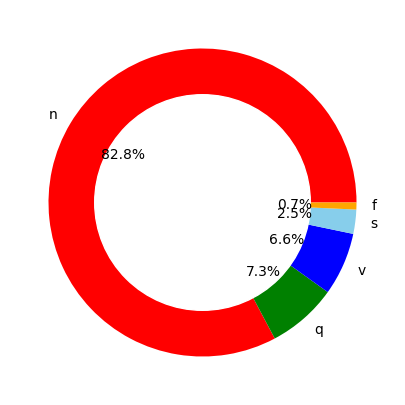

In [10]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train[187].value_counts(), labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
X_train = train.loc[:,:186]
y_train = train.loc[:,187]
X_test = test.loc[:,:186]
y_test = test.loc[:,187]

## feature extraction

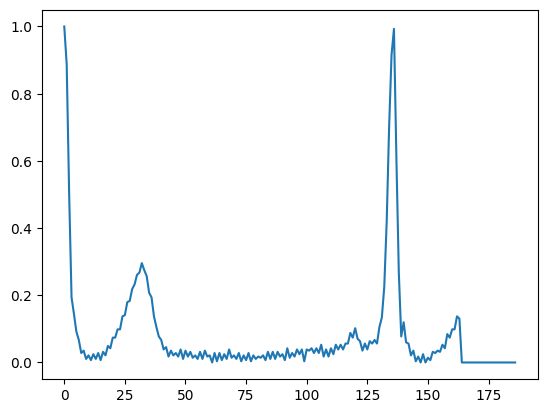

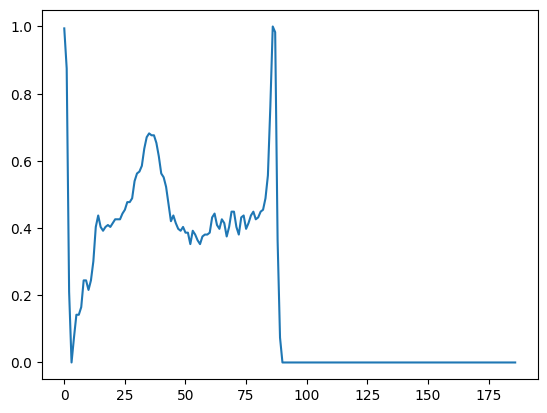

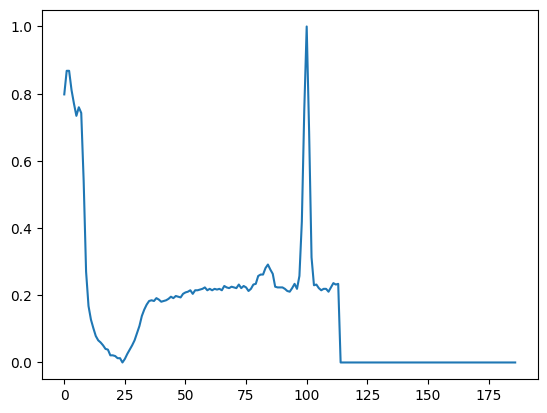

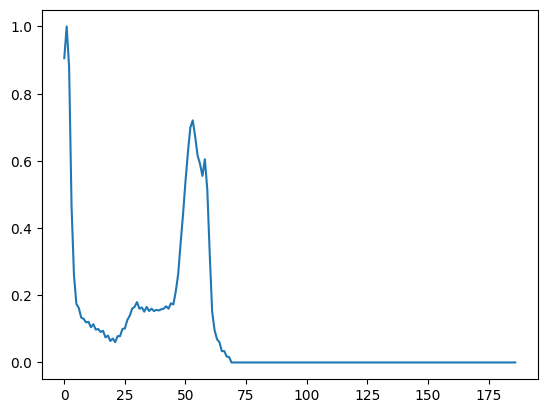

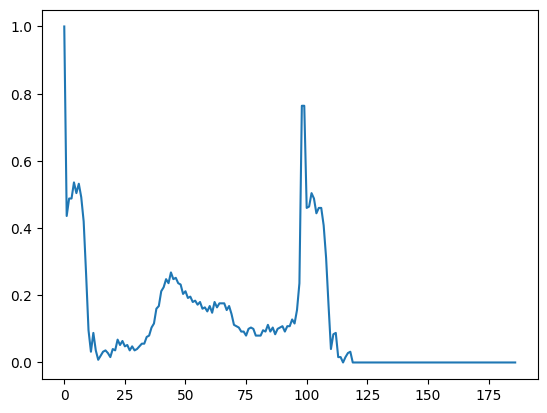

In [12]:
for i in range(5):
    X_sample = X_train[y_train == i]
    sample = X_sample.sample()
    plt.plot(sample.to_numpy().flatten())
    plt.show()

In [11]:
def processing_period(df, desired_length = 10000):
    results = []
    for index, sample in df.iterrows():
        sample = sample.to_numpy().flatten()
        nonzeros_index = np.nonzero(sample)[0]
        last_nonzero_index = nonzeros_index[-1]
        sample = sample[:last_nonzero_index+1]
        repetitions = int(np.ceil(desired_length / len(sample)))
        repeated_signal = np.resize(sample, repetitions * len(sample))
        repeated_signal = repeated_signal[:desired_length]
        results.append(repeated_signal)
    return np.array(results)
#tran ram chưa chạy

In [13]:
def extract_feature_means(csv_path):
    # config settings
    number_of_mfcc = 30

    sr = 360
    data = pd.read_csv(csv_path, header = None)

    signal = data.iloc[:,:187]

    signal = signal.to_numpy()

    label = data[187]

    

    # Trim leading and trailing silence from an audio signal (silence before and after the actual audio)

    # 2. Fourier Transform
    # Default FFT window size
    n_fft = 2048  # FFT window size
    hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

    # Short-time Fourier transform (STFT)
    d_audio = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))

    # 3. Spectrogram
    # Convert an amplitude spectrogram to Decibels-scaled spectrogram.
    db_audio = librosa.amplitude_to_db(d_audio, ref=np.max)

    # 4. Create the Mel Spectrograms
    s_audio = librosa.feature.melspectrogram(y = signal, sr=sr, n_fft = n_fft, hop_length = hop_length)
    s_db_audio = librosa.amplitude_to_db(s_audio, ref=np.max)


    # 7. Spectral Centroid
    # Note: Indicates where the ”centre of mass” for a sound is located and is calculated
    # as the weighted mean of the frequencies present in the sound.

    # Calculate the Spectral Centroids
    spectral_centroids = librosa.feature.spectral_centroid(y = signal, sr=sr, n_fft = n_fft, hop_length = hop_length)

    # 8. Chroma Frequencies¶
    # Note: Chroma features are an interesting and powerful representation
    # for music audio in which the entire spectrum is projected onto 12 bins
    # representing the 12 distinct semitones ( or chromas) of the musical octave.

    # Increase or decrease hop_length to change how granular you want your data to be
    # hop_length = c.HOP_LENGTH

    # # Chromogram
    # chromagram = librosa.feature.chroma_stft(y = signal, sr=sr, n_fft = n_fft,  hop_length=hop_length)

    # # 9. Tempo BPM (beats per minute)¶
    # # Note: Dynamic programming beat tracker.

    # # Create Tempo BPM variable
    # tempo_y, _ = librosa.beat.beat_track(signal, sr=sr)

    # # 10. Spectral Rolloff
    # # Note: Is a measure of the shape of the signal. It represents the frequency below which a specified
    # #  percentage of the total spectral energy(e.g. 85 %) lies.

    # # Spectral RollOff Vector
    # spectral_rolloff = librosa.feature.spectral_rolloff(signal, sr=sr)[0]

    # # spectral flux
    # onset_env = librosa.onset.onset_strength(y=signal, sr=sr)

    # # Spectral Bandwidth¶
    # # The spectral bandwidth is defined as the width of the band of light at one-half the peak
    # # maximum (or full width at half maximum [FWHM]) and is represented by the two vertical
    # # red lines and λSB on the wavelength axis.
    # spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(signal, sr=sr)[0]
    # spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(signal, sr=sr, p=3)[0]
    # spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(signal, sr=sr, p=4)[0]

    audio_features = {
        # "file_name": audio_file_path,
        # "zero_crossing_rate": np.mean(librosa.feature.zero_crossing_rate(signal)[0]),
        # "zero_crossings": np.sum(librosa.zero_crossings(signal, pad=False)),
        "spectrogram": db_audio.mean(axis = (1,2)),
        "mel_spectrogram": s_db_audio.mean(axis = (1,2)),
        # "harmonics": np.mean(y_harm),
        # "perceptual_shock_wave": np.mean(y_perc),
        "spectral_centroids": np.mean(spectral_centroids, axis = (1,2)),
#         "spectral_centroids_delta": np.mean(spectral_centroids_delta, axis = (1,2)),
#         "spectral_centroids_accelerate": np.mean(spectral_centroids_accelerate, axis = (1,2)),
        # "chroma1": np.mean(chromagram[:,0,:], axis = 1),
        # "chroma2": np.mean(chromagram[:,1,:], axis = 1),
        # "chroma3": np.mean(chromagram[:,2,:], axis = 1),
        # "chroma4": np.mean(chromagram[:,3,:], axis = 1),
        # "chroma5": np.mean(chromagram[:,4,:], axis = 1),
        # "chroma6": np.mean(chromagram[:,5,:], axis = 1),
        # "chroma7": np.mean(chromagram[:,6,:], axis = 1),
        # "chroma8": np.mean(chromagram[:,7,:], axis = 1),
        # "chroma9": np.mean(chromagram[:,8,:], axis = 1),
        # "chroma10": np.mean(chromagram[:,9,:], axis = 1),
        # "chroma11": np.mean(chromagram[:,10,:], axis = 1),
        # "chroma12": np.mean(chromagram[:,11,:], axis = 1),
        # "tempo_bpm": tempo_y,
        # "spectral_rolloff": np.mean(spectral_rolloff),
        # "spectral_flux": np.mean(onset_env),
        # "spectral_bandwidth_2": np.mean(spectral_bandwidth_2),
        # "spectral_bandwidth_3": np.mean(spectral_bandwidth_3),
        # "spectral_bandwidth_4": np.mean(spectral_bandwidth_4),
    }

    # extract mfcc feature
    # mfcc_df = extract_mfcc_feature_means(audio_file_path,
    #                                 signal,
    #                                 sample_rate=sr,
    #                                 number_of_mfcc=number_of_mfcc)

    df_feature = pd.DataFrame(audio_features)

    df_mfccs = extract_mfcc_feature_means(signal,sr,number_of_mfcc,n_fft,hop_length)



    # df_mfccs.add_prefix("mfcc_")



    df = pd.concat([df_feature, df_mfccs], axis = 1)
    # df = df_feature

    return df, label

    # librosa.feature.mfcc(signal)[0, 0]

def extract_mfcc_feature_means(signal: np.ndarray,
                          sample_rate: int,
                          number_of_mfcc: int,
                          n_fft: int,
                          hop_length: int):

    mfcc_alt = librosa.feature.mfcc(y=signal, sr=sample_rate,
                                    n_mfcc=number_of_mfcc, n_fft = n_fft, hop_length = hop_length)
    # delta = librosa.feature.delta(mfcc_alt)
    # accelerate = librosa.feature.delta(mfcc_alt, order=2)

    mfcc_features = dict()

    for i in range(0, number_of_mfcc):
        # dict.update({'key3': 'geeks'})

        # mfcc coefficient
        key_name = "".join(['mfcc', str(i)])
        mfcc_value = np.mean(mfcc_alt[:,i,:], axis = 1)
        mfcc_features.update({key_name: mfcc_value})

        # mfcc delta coefficient
#         key_name = "".join(['mfcc_delta_', str(i)])
#         mfcc_value = np.mean(delta[:,i,:], axis = 1)
#         mfcc_features.update({key_name: mfcc_value})

        # mfcc accelerate coefficient
#         key_name = "".join(['mfcc_accelerate_', str(i)])
#         mfcc_value = np.mean(accelerate[:,i,:], axis = 1)
#         mfcc_features.update({key_name: mfcc_value})

    df = pd.DataFrame(mfcc_features)
    return df

In [15]:
X_train, y_train = extract_feature_means("E:\Học máy trong y tế\\archive\mitbih_train.csv")

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=187
  warnings.warn(


In [16]:
X_train.head()

,spectrogram,mel_spectrogram,spectral_centroids,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29
0,-42.463499,-69.859098,45.966614,96.368042,78.955963,25.090781,-4.269415,7.716490,5.951492,-2.133611,...,2.608999,-0.242751,2.273750,1.100244,0.864618,0.238039,1.570205,0.479537,1.366690,-0.245094
1,-42.468288,-70.001496,47.813585,97.811236,78.417593,15.767274,5.586175,2.846357,4.782573,-0.354382,...,0.718187,1.444146,0.897962,1.254537,0.114853,1.132194,1.606628,0.732897,0.836393,-0.690070
2,-42.104478,-70.214030,56.522218,102.989377,62.686241,3.736387,4.296349,3.126065,3.128723,2.632133,...,2.095190,0.835014,1.985933,0.775666,1.538493,1.339909,1.551413,1.500460,2.047328,1.998223
3,-42.844178,-71.573750,48.407484,91.994090,65.886737,31.552242,4.913820,6.780340,0.140697,2.897800,...,2.087515,1.664500,0.684609,0.823417,1.196905,2.578723,3.138864,2.597131,2.519514,4.011928
4,-42.860512,-70.474976,42.447098,92.166930,81.620506,29.752398,10.938586,2.742552,3.457387,-2.233709,...,3.561282,4.143607,0.477818,0.122286,3.308722,1.400983,-0.866537,-0.724150,1.666786,1.127532


<AxesSubplot: >

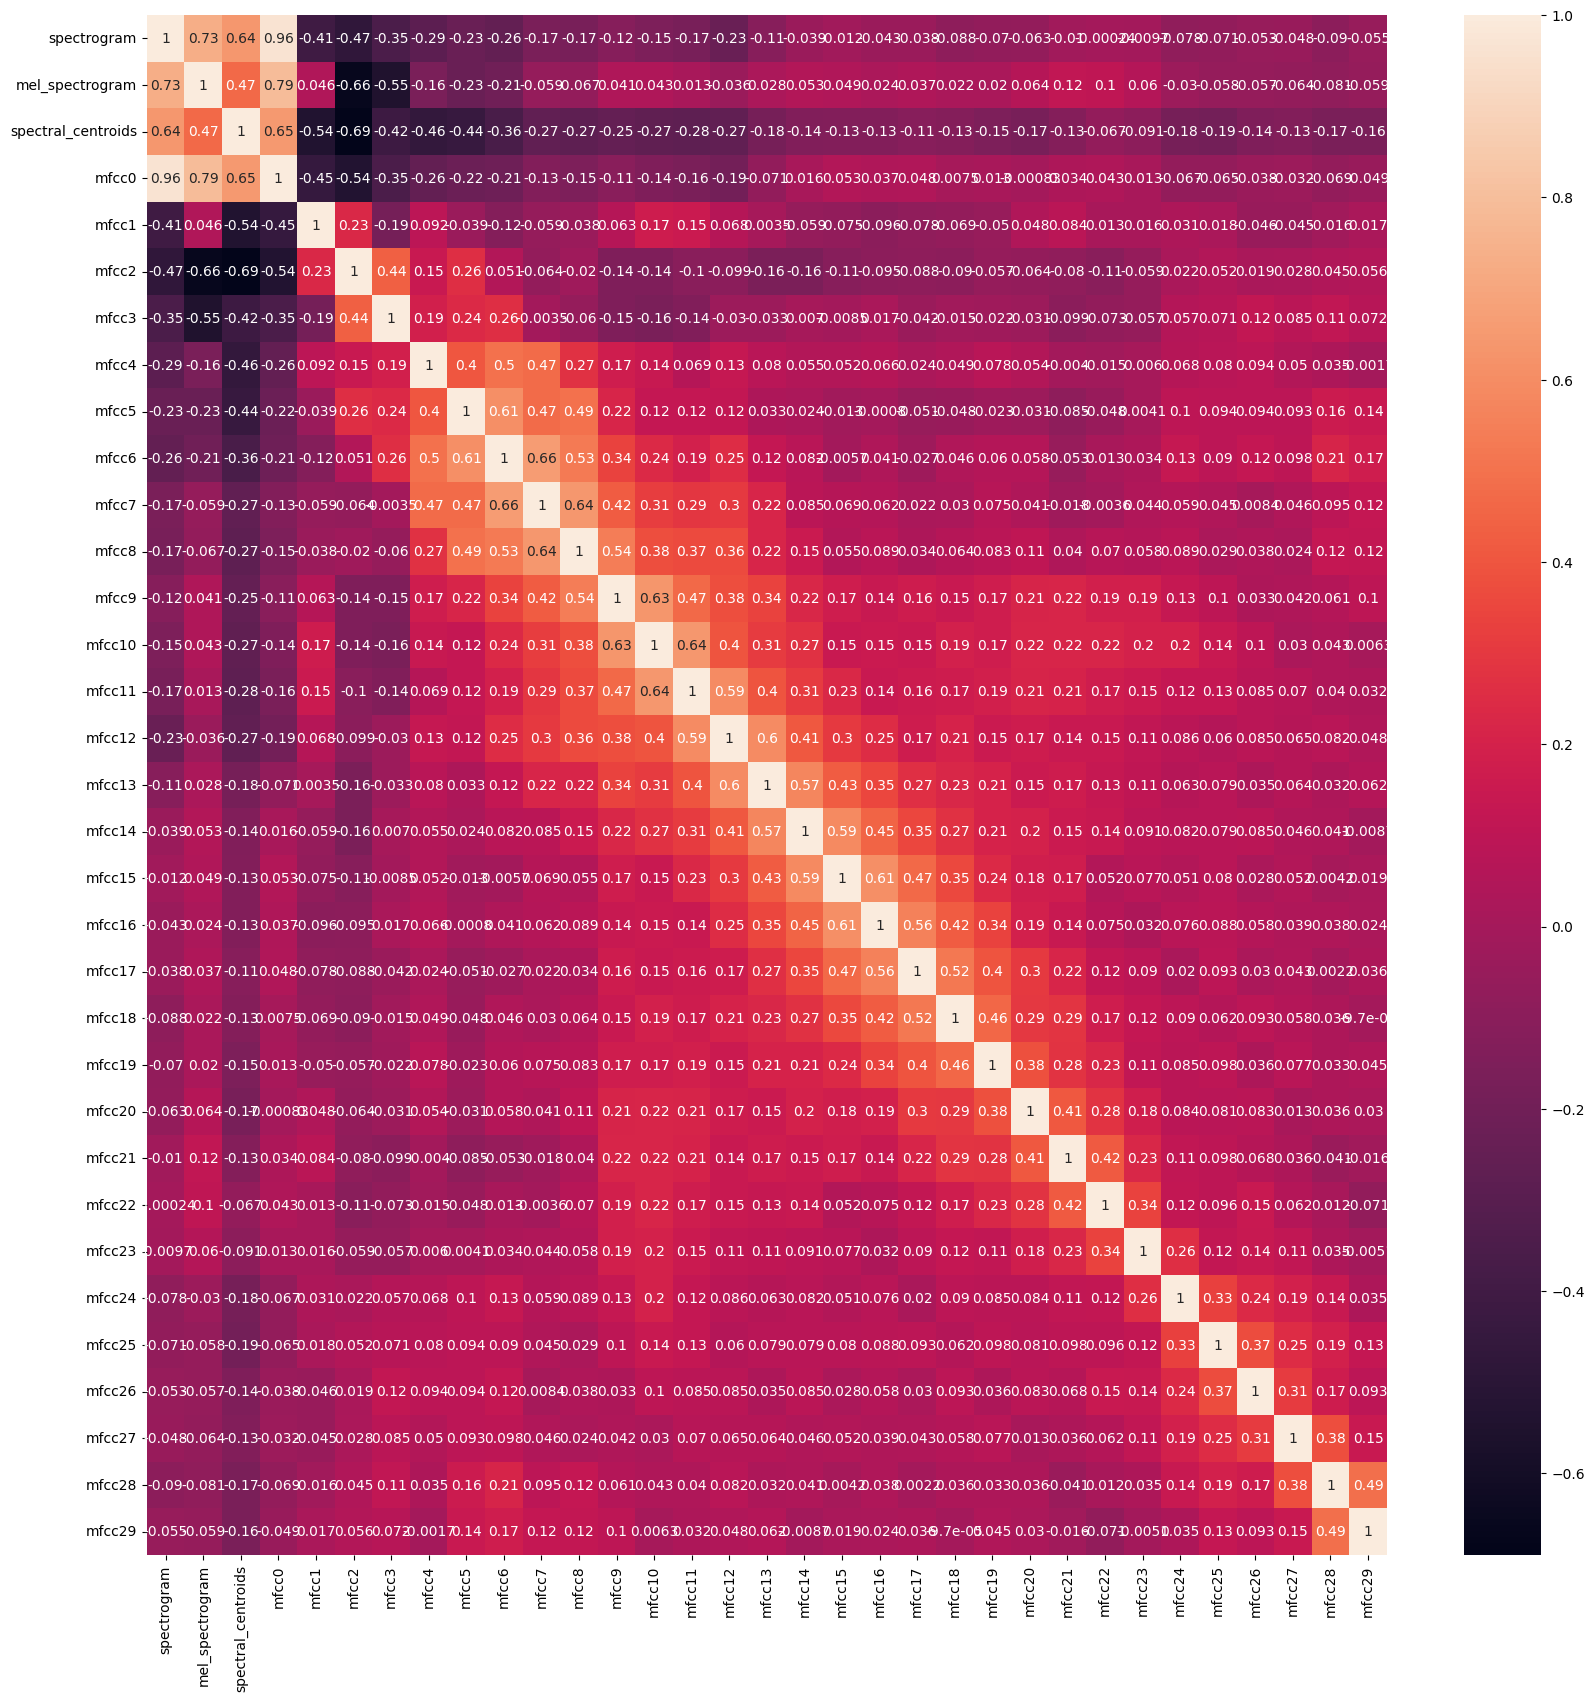

In [27]:
plt.figure(figsize=(20,20))

sns.heatmap(X_train.corr(), annot=True)

In [17]:
X_test, y_test = extract_feature_means("E:\Học máy trong y tế\\archive\mitbih_test.csv")

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=187
  warnings.warn(


In [57]:
#mfccs_train, mfccs_val, y_train, y_val = train_test_split(mfccs_all,y_train,test_size = 0.2, random_state= 42)

In [18]:
def lgb_objective(trial):
    params = {
        'num_leaves': trial.suggest_int("num_leaves", 60, 90),
        'learning_rate': trial.suggest_float("learning_rate", 0.05, 0.2, log = True),
        'n_estimators': trial.suggest_int("n_estimators", 600, 2000),
        'max_depth': trial.suggest_int("max_depth", 8, 12),
    }

    model = LGBMClassifier(**params)

    #model.fit(mfccs_train, y_train)
    model.fit(X_train,y_train)
    #y_pred = model.predict(mfccs_val)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [19]:
study = optuna.create_study(direction="maximize", study_name="Classifier")
study.optimize(lgb_objective, n_trials=30)

[I 2023-05-24 21:45:32,952] A new study created in memory with name: Classifier
[I 2023-05-24 21:46:11,766] Trial 0 finished with value: 0.9723643340032889 and parameters: {'num_leaves': 64, 'learning_rate': 0.10685693809499192, 'n_estimators': 830, 'max_depth': 12}. Best is trial 0 with value: 0.9723643340032889.
[I 2023-05-24 21:47:04,268] Trial 1 finished with value: 0.9712680431207747 and parameters: {'num_leaves': 74, 'learning_rate': 0.1864408409481316, 'n_estimators': 1092, 'max_depth': 12}. Best is trial 0 with value: 0.9723643340032889.
[I 2023-05-24 21:48:25,342] Trial 2 finished with value: 0.9728668006577745 and parameters: {'num_leaves': 81, 'learning_rate': 0.08306964965760753, 'n_estimators': 1664, 'max_depth': 10}. Best is trial 2 with value: 0.9728668006577745.
[I 2023-05-24 21:49:15,427] Trial 3 finished with value: 0.9723186552165175 and parameters: {'num_leaves': 88, 'learning_rate': 0.05394096007655469, 'n_estimators': 730, 'max_depth': 11}. Best is trial 2 with va

In [20]:
importance = optuna.importance.get_param_importances(study)

# Print the parameter importances
for param, importance_value in importance.items():
    print(f"Parameter: {param}, Importance: {importance_value}")

Parameter: learning_rate, Importance: 0.4599988013917969
Parameter: n_estimators, Importance: 0.28974830376073707
Parameter: max_depth, Importance: 0.18957337464651433
Parameter: num_leaves, Importance: 0.06067952020095173


In [21]:
trials_df = study.trials_dataframe()

In [22]:
trials_df

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_n_estimators,params_num_leaves,state
0,0,0.972364,2023-05-24 21:45:32.970876,2023-05-24 21:46:11.766218,0 days 00:00:38.795342,0.106857,12,830,64,COMPLETE
1,1,0.971268,2023-05-24 21:46:11.767220,2023-05-24 21:47:04.267353,0 days 00:00:52.500133,0.186441,12,1092,74,COMPLETE
2,2,0.972867,2023-05-24 21:47:04.270362,2023-05-24 21:48:25.341947,0 days 00:01:21.071585,0.083070,10,1664,81,COMPLETE
3,3,0.972319,2023-05-24 21:48:25.343963,2023-05-24 21:49:15.426603,0 days 00:00:50.082640,0.053941,11,730,88,COMPLETE
4,4,0.971405,2023-05-24 21:49:15.428618,2023-05-24 21:50:10.485531,0 days 00:00:55.056913,0.050286,12,694,82,COMPLETE
5,5,0.972775,2023-05-24 21:50:10.488035,2023-05-24 21:51:19.083407,0 days 00:01:08.595372,0.069096,9,1356,82,COMPLETE
6,6,0.972273,2023-05-24 21:51:19.084407,2023-05-24 21:51:57.628558,0 days 00:00:38.544151,0.074002,9,774,64,COMPLETE
7,7,0.971816,2023-05-24 21:51:57.629558,2023-05-24 21:52:32.160013,0 days 00:00:34.530455,0.146601,9,827,67,COMPLETE
8,8,0.972136,2023-05-24 21:52:32.161013,2023-05-24 21:53:36.303208,0 days 00:01:04.142195,0.123556,10,1139,63,COMPLETE
9,9,0.972319,2023-05-24 21:53:36.305714,2023-05-24 21:54:59.223212,0 days 00:01:22.917498,0.050997,9,1438,90,COMPLETE


In [23]:
trials_df.query("value > 0.972")

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_n_estimators,params_num_leaves,state
0,0,0.972364,2023-05-24 21:45:32.970876,2023-05-24 21:46:11.766218,0 days 00:00:38.795342,0.106857,12,830,64,COMPLETE
2,2,0.972867,2023-05-24 21:47:04.270362,2023-05-24 21:48:25.341947,0 days 00:01:21.071585,0.083070,10,1664,81,COMPLETE
3,3,0.972319,2023-05-24 21:48:25.343963,2023-05-24 21:49:15.426603,0 days 00:00:50.082640,0.053941,11,730,88,COMPLETE
5,5,0.972775,2023-05-24 21:50:10.488035,2023-05-24 21:51:19.083407,0 days 00:01:08.595372,0.069096,9,1356,82,COMPLETE
6,6,0.972273,2023-05-24 21:51:19.084407,2023-05-24 21:51:57.628558,0 days 00:00:38.544151,0.074002,9,774,64,COMPLETE
8,8,0.972136,2023-05-24 21:52:32.161013,2023-05-24 21:53:36.303208,0 days 00:01:04.142195,0.123556,10,1139,63,COMPLETE
9,9,0.972319,2023-05-24 21:53:36.305714,2023-05-24 21:54:59.223212,0 days 00:01:22.917498,0.050997,9,1438,90,COMPLETE
10,10,0.972045,2023-05-24 21:54:59.228541,2023-05-24 21:56:45.286789,0 days 00:01:46.058248,0.086997,8,1767,74,COMPLETE
11,11,0.972775,2023-05-24 21:56:45.287791,2023-05-24 21:57:57.468257,0 days 00:01:12.180466,0.074733,10,1648,81,COMPLETE
12,12,0.972182,2023-05-24 21:57:57.469259,2023-05-24 21:59:16.249294,0 days 00:01:18.780035,0.070161,8,1943,81,COMPLETE


In [24]:
params = study.best_params

In [25]:
lgb_model = LGBMClassifier(**params)
lgb_model.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.06070970670722344, max_depth=10,
               n_estimators=1541, num_leaves=78)

In [28]:
y_pred = lgb_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972912479444546


In [34]:
import pickle
filename = "E:\Học máy trong y tế\\New Text Document.txt"
pickle.dump(lgb_model, open(filename, 'wb'))

In [64]:
feature_importances = lgb_model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(lgb_model.feature_name_, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: mfcc2, Importance: 5529
Feature: mfcc4, Importance: 5485
Feature: mfcc1, Importance: 5037
Feature: mfcc3, Importance: 4679
Feature: spectral_centroids, Importance: 4633
Feature: spectrogram, Importance: 4209
Feature: mfcc0, Importance: 4010
Feature: mfcc5, Importance: 3976
Feature: mel_spectrogram, Importance: 3911
Feature: mfcc7, Importance: 3834
Feature: mfcc6, Importance: 3639
Feature: mfcc9, Importance: 3492
Feature: mfcc8, Importance: 3278
Feature: mfcc11, Importance: 3255
Feature: mfcc10, Importance: 3148
Feature: mfcc12, Importance: 3143
Feature: mfcc29, Importance: 3115
Feature: mfcc15, Importance: 2962
Feature: mfcc20, Importance: 2880
Feature: mfcc28, Importance: 2880
Feature: mfcc13, Importance: 2850
Feature: mfcc25, Importance: 2844
Feature: mfcc27, Importance: 2836
Feature: mfcc16, Importance: 2829
Feature: mfcc23, Importance: 2752
Feature: mfcc18, Importance: 2739
Feature: mfcc24, Importance: 2677
Feature: mfcc17, Importance: 2645
Feature: mfcc22, Importance: 263

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

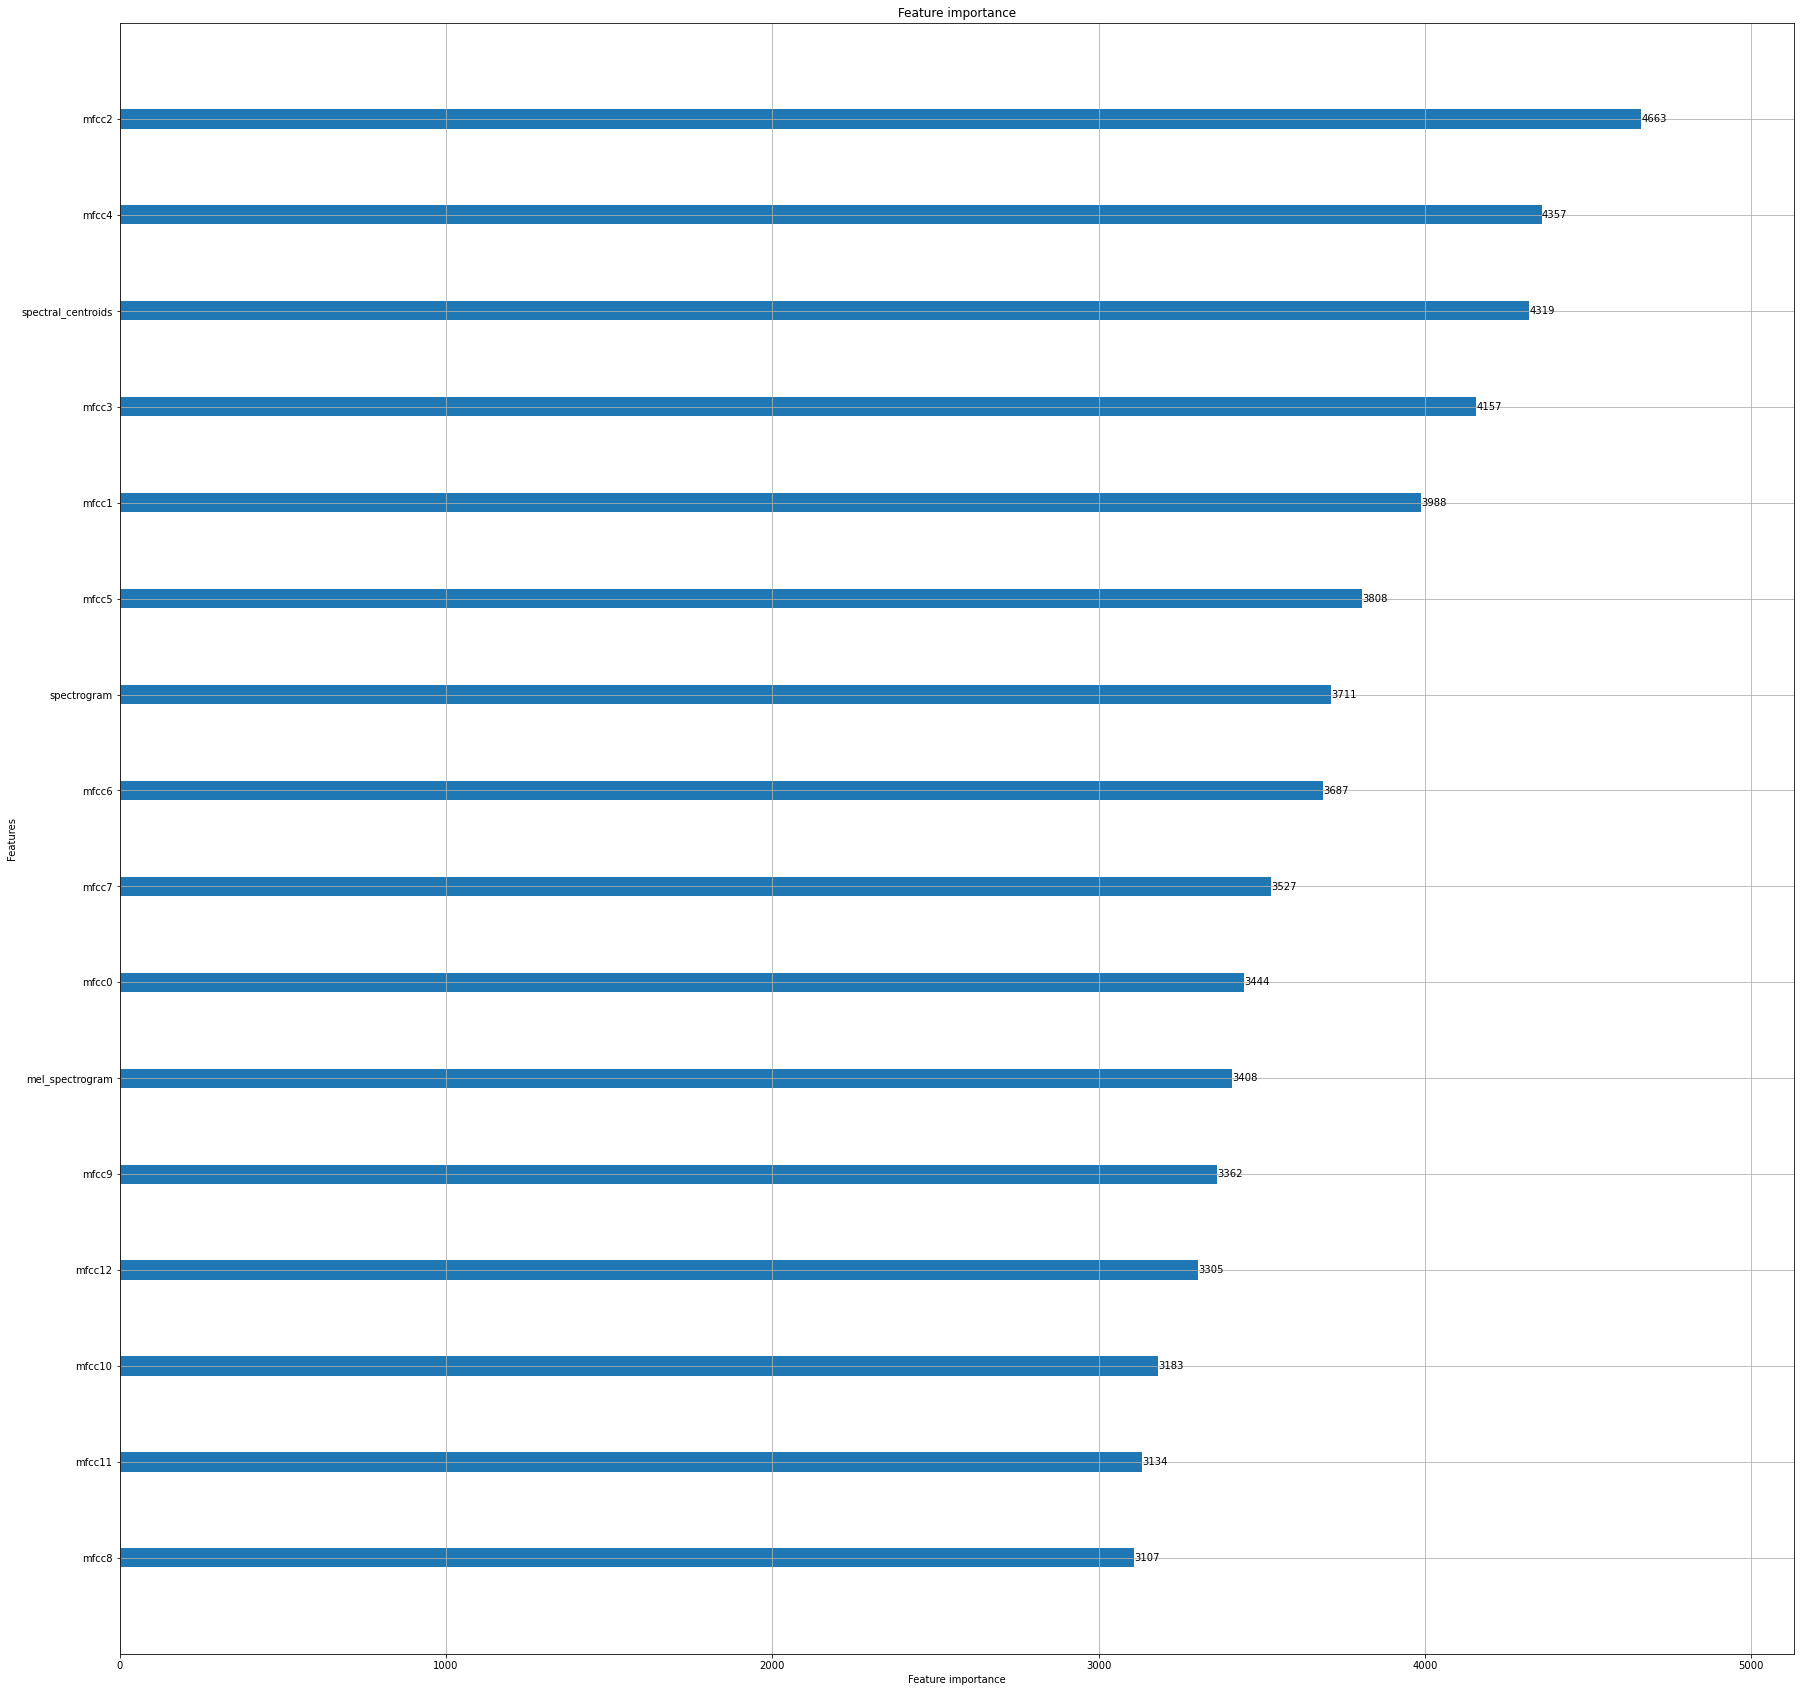

In [53]:
plot_importance(lgb_model, figsize=(30,30))

In [ ]:
y_pred = lgb_model.predict(mfccs_test)

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred = y_pred, y_true = y_test)